In [2]:
import pandas as pd
import numpy as np

## 1. Cargar los datos correspondientes a la zona de Piemonte (Italia).


In [3]:
data = pd.read_csv('/content/sample_data/Piemonte.csv')
data

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0
...,...,...,...,...,...,...,...,...,...,...,...
4363,20,31/03/06,243.6,393.64,4986.79,1.21,286.29,849.12,0.0,163.71,60.0
4364,21,31/03/06,243.6,396.04,4992.42,1.43,286.84,942.25,0.0,158.24,52.0
4365,22,31/03/06,118.5,489.00,4971.80,3.41,286.93,1114.30,0.0,30.59,32.0
4366,23,31/03/06,131.0,454.26,5019.81,1.83,285.92,693.04,0.0,25.73,35.0


## 2. Obtener un breve resumen estadístico.


In [4]:
data.describe()

,Station.ID,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10
count,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000
mean,12.500000,245.633333,433.555417,4998.935000,0.940293,278.342005,604.859396,1.481511,33.582708,63.318698
std,6.922979,107.792446,38.178164,40.983389,0.518687,4.991900,316.216412,5.104482,42.974367,34.351456
min,1.000000,95.200000,368.180000,4915.520000,0.240000,267.990000,89.060000,0.000000,4.710000,1.000000
25%,6.750000,152.975000,395.680000,4971.762500,0.620000,274.410000,364.270000,0.000000,14.430000,38.000000
50%,12.500000,243.250000,437.025000,4992.950000,0.820000,276.890000,555.310000,0.000000,22.450000,61.000000
75%,18.250000,317.650000,467.162500,5029.502500,1.100000,283.055000,780.275000,0.000000,30.340000,82.000000
max,24.000000,551.600000,490.710000,5086.600000,6.170000,289.830000,1937.900000,59.830000,255.310000,247.000000


## 3. Comprobar la tipología de los datos.

In [5]:
data.dtypes

,0
Station.ID,int64
Date,object
A,float64
UTMX,float64
UTMY,float64
WS,float64
TEMP,float64
HMIX,float64
PREC,float64
EMI,float64


## 4. Transformar la variable ‘Date’ a formato fecha.


In [6]:
data["Date"]

,Date
0,01/10/05
1,01/10/05
2,01/10/05
3,01/10/05
4,01/10/05
...,...
4363,31/03/06
4364,31/03/06
4365,31/03/06
4366,31/03/06


In [8]:
data["Fecha"] = pd.to_datetime(data["Date"], format = "%d/%m/%y")
data.dtypes

,0
Station.ID,int64
Date,object
A,float64
UTMX,float64
UTMY,float64
WS,float64
TEMP,float64
HMIX,float64
PREC,float64
EMI,float64


## 5. Comprobar que se ha realizado el cambio correctamente.


In [9]:
data[["Date", "Fecha"]]

,Date,Fecha
0,01/10/05,2005-10-01
1,01/10/05,2005-10-01
2,01/10/05,2005-10-01
3,01/10/05,2005-10-01
4,01/10/05,2005-10-01
...,...,...
4363,31/03/06,2006-03-31
4364,31/03/06,2006-03-31
4365,31/03/06,2006-03-31
4366,31/03/06,2006-03-31


## 6. Descomponer la fecha en años.

In [10]:
data["Anio"] = data["Fecha"].dt.year
data[["Fecha", "Anio"]]

,Fecha,Anio
0,2005-10-01,2005
1,2005-10-01,2005
2,2005-10-01,2005
3,2005-10-01,2005
4,2005-10-01,2005
...,...,...
4363,2006-03-31,2006
4364,2006-03-31,2006
4365,2006-03-31,2006
4366,2006-03-31,2006


## 7. Crear un nuevo data frame solo con las observaciones del año 2005.

In [14]:
data["Anio"]==2005
data05 = data[data["Anio"]==2005].copy()
data05

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10,Fecha,Anio
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0,2005-10-01,2005
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0,2005-10-01,2005
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0,2005-10-01,2005
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0,2005-10-01,2005
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0,2005-10-01,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,91.0,2005-12-31,2005
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,93.0,2005-12-31,2005
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,78.0,2005-12-31,2005
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,71.0,2005-12-31,2005


## 8. Descomponer la fecha en meses.


In [15]:
data05["Mes"] = data05["Fecha"].dt.month
data05[["Fecha", "Mes"]]

,Fecha,Mes
0,2005-10-01,10
1,2005-10-01,10
2,2005-10-01,10
3,2005-10-01,10
4,2005-10-01,10
...,...,...
2203,2005-12-31,12
2204,2005-12-31,12
2205,2005-12-31,12
2206,2005-12-31,12


## 9. ¿Cuántas observaciones se han hecho en cada mes?


In [17]:
data05["Mes"].unique()

array([10, 11, 12], dtype=int32)

In [18]:
data05["Mes"].value_counts()

,count
Mes,
10,744
12,744
11,720


<Axes: xlabel='Mes'>

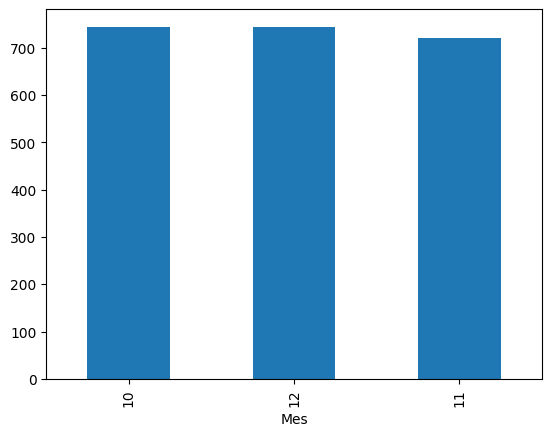

In [19]:
data05["Mes"].value_counts().plot(kind="bar")

## 10. Cambiar el formato de la fecha a:


a. Nombre completo del día de la semana, Nombre completo del mes, Año
en formato largo y Numero del día del año.


In [21]:
formato1 = "%A %B %Y %j"
data05["Fecha_formato1"] = data05["Fecha"].dt.strftime(formato1)
data05

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10,Fecha,Anio,Mes,Fecha_formato1
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0,2005-10-01,2005,10,Saturday October 2005 274
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0,2005-10-01,2005,10,Saturday October 2005 274
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0,2005-10-01,2005,10,Saturday October 2005 274
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0,2005-10-01,2005,10,Saturday October 2005 274
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0,2005-10-01,2005,10,Saturday October 2005 274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,91.0,2005-12-31,2005,12,Saturday December 2005 365
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,93.0,2005-12-31,2005,12,Saturday December 2005 365
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,78.0,2005-12-31,2005,12,Saturday December 2005 365
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,71.0,2005-12-31,2005,12,Saturday December 2005 365


b. Número de semana del año, día del mes, año.



In [22]:
formato2 = "%U %d %y"
data05["Fecha_formato2"] = data05["Fecha"].dt.strftime(formato2)
data05

,Station.ID,Date,A,UTMX,UTMY,WS,TEMP,HMIX,PREC,EMI,PM10,Fecha,Anio,Mes,Fecha_formato1,Fecha_formato2
0,1,01/10/05,95.2,469.45,4972.85,0.90,288.81,1294.60,0.0,26.05,28.0,2005-10-01,2005,10,Saturday October 2005 274,39 01 05
1,2,01/10/05,164.1,423.48,4950.69,0.82,288.67,1139.80,0.0,18.74,22.0,2005-10-01,2005,10,Saturday October 2005 274,39 01 05
2,3,01/10/05,242.9,490.71,4948.86,0.96,287.44,1404.00,0.0,6.28,17.0,2005-10-01,2005,10,Saturday October 2005 274,39 01 05
3,4,01/10/05,149.9,437.36,4973.34,1.17,288.63,1042.40,0.0,29.35,25.0,2005-10-01,2005,10,Saturday October 2005 274,39 01 05
4,5,01/10/05,405.0,426.44,5045.66,0.60,287.63,1038.70,0.0,32.19,20.0,2005-10-01,2005,10,Saturday October 2005 274,39 01 05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,20,31/12/05,243.6,393.64,4986.79,0.57,272.66,389.69,0.0,165.05,91.0,2005-12-31,2005,12,Saturday December 2005 365,52 31 05
2204,21,31/12/05,243.6,396.04,4992.42,0.56,272.98,450.14,0.0,165.20,93.0,2005-12-31,2005,12,Saturday December 2005 365,52 31 05
2205,22,31/12/05,118.5,489.00,4971.80,0.55,272.59,239.88,0.0,20.38,78.0,2005-12-31,2005,12,Saturday December 2005 365,52 31 05
2206,23,31/12/05,131.0,454.26,5019.81,0.96,272.79,395.43,0.0,22.72,71.0,2005-12-31,2005,12,Saturday December 2005 365,52 31 05


Formatos
* %a	Nombre local abreviado de día de semana
* %A	Nombre local completo de día de semana
* %b	Nombre local abreviado de mes
* %B	Nombre local completo de mes
* %c	Representación local de fecha y hora
* %d	Día de mes
* %H	Hora (horario 24 horas)
* %I	Hora (horario 12 horas)
* %j	Número de día del año
* %m	Mes
* %M	Minuto
* %p	Etiqueta AM o PM
* %S	Segundo
* %U	Nº semana del año. Se considera al Domingo como primer día de semana
* %w	Establece el primer día de semana [0(Domingo),1(Lunes)... 6].
* %W	Nº semana del año (Se considera al Lunes como primer día de semana)
* %x	Fecha local
* %X	Hora local
* %y	Año en formato corto
* %Y	Año en formato largo
* %Z	Nombre de Zona Horaria

## 11. Calcular los días que faltan para que se termine el curso.


In [27]:
from datetime import date
date(2025,8,5)
(date(2025,8,5) - date.today()).days

42

## 12. Gráficos:


a. Distribución de las precipitaciones


<Axes: >

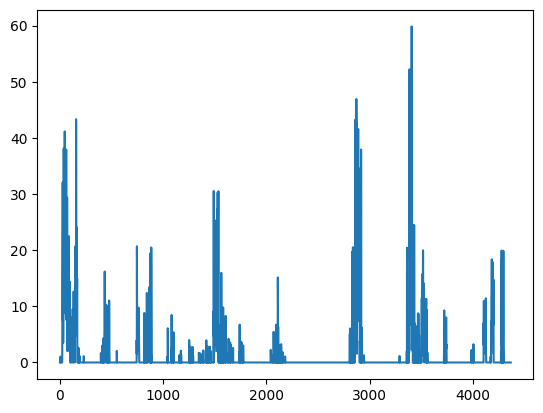

In [32]:
data["PREC"].plot(kind="line")

<Axes: xlabel='Fecha'>

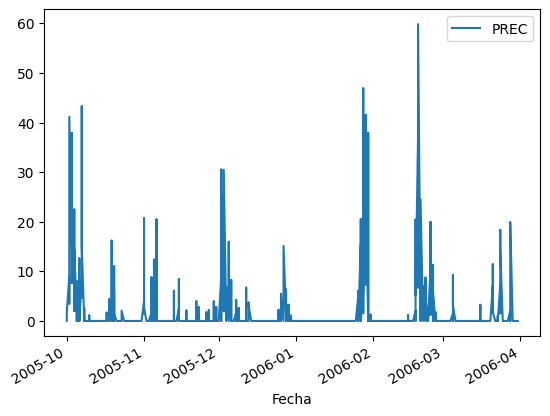

In [34]:
data.plot.line(x="Fecha", y="PREC")

<Axes: ylabel='Density'>

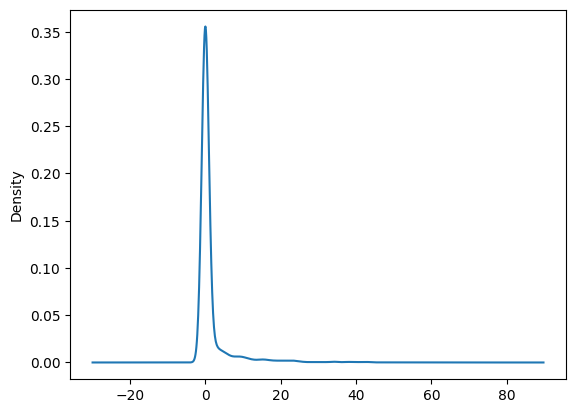

In [35]:
data["PREC"].plot(kind="kde")

b. Distribución de ‘ws’ y ‘precipitaciones

<Axes: xlabel='Fecha'>

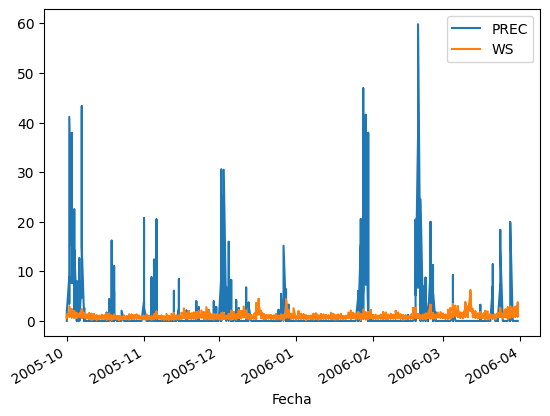

In [36]:
data.plot.line(x="Fecha", y=["PREC", "WS"])